In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

In [2]:
messages= [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print(len(messages))

5574


In [3]:
for messages_no, message in enumerate(messages[:10]):
    print(messages_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [4]:
import pandas as pd

In [5]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['labels','messages'])

In [6]:
messages.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
messages.describe()

,labels,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
messages.groupby('labels').describe()

messages                                                               
          count unique                                                top freq
labels                                                                        
ham        4825   4516                             Sorry, I'll call later   30
spam        747    653  Please call our customer service representativ...    4

In [9]:
messages['length']=messages['messages'].apply(len)

In [10]:
sum(messages['length'])

448490

In [26]:
messages.head()

,labels,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

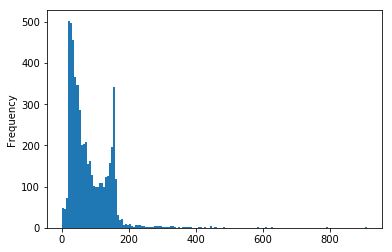

In [13]:
messages['length'].plot.hist(bins=150)

In [14]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [15]:

messages[messages['length']==910]['messages'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002212E093EB8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002212E1D9AC8>], dtype=object)

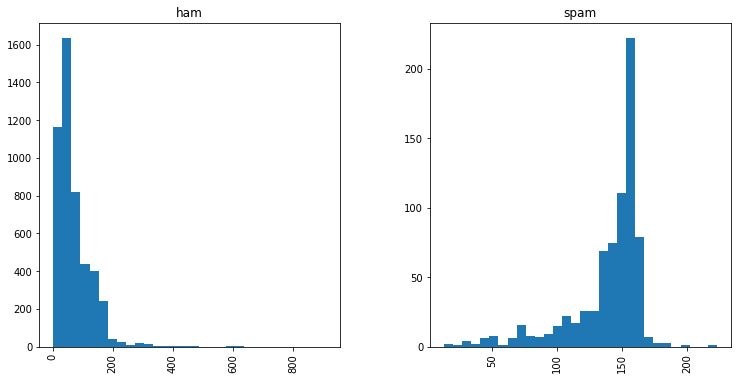

In [16]:
messages.hist('length',by='labels',bins=30,figsize=(12,6))

In [17]:
messages[messages['length']==910]['messages'].count()

1

In [18]:
import string

mess = 'HELLO, MY NAME IS APPY. How are you?'

punk= [c for c in mess if c not in string.punctuation]

In [19]:
punk

['H',
 'E',
 'L',
 'L',
 'O',
 ' ',
 'M',
 'Y',
 ' ',
 'N',
 'A',
 'M',
 'E',
 ' ',
 'I',
 'S',
 ' ',
 'A',
 'P',
 'P',
 'Y',
 ' ',
 'H',
 'o',
 'w',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'y',
 'o',
 'u']

In [28]:
from nltk.corpus import stopwords
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [29]:

lool= messages[messages['length']==910]['messages'].iloc[0]

In [30]:
punk= ''.join(punk)

In [31]:
punk


'HELLO MY NAME IS APPY How are you'

In [32]:
punk.split()

['HELLO', 'MY', 'NAME', 'IS', 'APPY', 'How', 'are', 'you']

In [33]:
nopunk= [b for b in lool if b not in string.punctuation]
lool.split()[:10]

['For',
 'me',
 'the',
 'love',
 'should',
 'start',
 'with',
 'attraction.i',
 'should',
 'feel']

In [34]:
nopunk =''.join(nopunk)

In [35]:
nopunk

'For me the love should start with attractioni should feel that I need her every time around meshe should be the first thing which comes in my thoughtsI would start the day and end it with hershe should be there every time I dreamlove will be then when my every breath has her namemy life should happen around hermy life will be named to herI would cry for herwill give all my happiness and take all her sorrowsI will be ready to fight with anyone for herI will be in love when I will be doing the craziest things for herlove will be when I dont have to proove anyone that my girl is the most beautiful lady on the whole planetI will always be singing praises for herlove will be when I start up making chicken curry and end up makiing sambarlife will be the most beautiful thenwill get every morning and thank god for the day because she is with meI would like to say a lotwill tell later'

In [36]:
len(nopunk)

888

In [37]:
clean_lool = [ word for word in nopunk.split() if word.lower() not in stopwords.words('english')]

In [38]:
clean_lool[:20]

['love',
 'start',
 'attractioni',
 'feel',
 'need',
 'every',
 'time',
 'around',
 'meshe',
 'first',
 'thing',
 'comes',
 'thoughtsI',
 'would',
 'start',
 'day',
 'end',
 'hershe',
 'every',
 'time']

In [39]:
clean_lool= ' '.join(clean_lool)

In [40]:
clean_lool

'love start attractioni feel need every time around meshe first thing comes thoughtsI would start day end hershe every time dreamlove every breath namemy life happen around hermy life named herI would cry herwill give happiness take sorrowsI ready fight anyone herI love craziest things herlove dont proove anyone girl beautiful lady whole planetI always singing praises herlove start making chicken curry end makiing sambarlife beautiful thenwill get every morning thank god day meI would like say lotwill tell later'

In [41]:
clean_mess = [ word for word in punk.split() if word.lower() not in stopwords.words('english')]

In [42]:
clean_mess

['HELLO', 'NAME', 'APPY']

In [43]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [44]:
messages.head()

,labels,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [45]:
messages['messages'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messages, dtype: object

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
bt=CountVectorizer(analyzer=text_process).fit(messages['messages'])

In [48]:
len(bt.vocabulary_)

11425

In [49]:
#messages['messages'].iloc[3]

In [50]:
message4 = messages['messages'][3]

In [51]:
message4

'U dun say so early hor... U c already then say...'

In [52]:
bow4= bt.transform([message4])

In [53]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [54]:
print(bow4.shape)

(1, 11425)


In [55]:
bt.get_feature_names()[4068]


'U'

In [56]:
bt.get_feature_names()[9554]

'say'

In [59]:
messages_bow= bt.transform(messages['messages'])
messages_bow

<5572x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [ ]:
print{m}

In [60]:
print ('shape of the matrix:', messages_bow.shape)

shape of the matrix: (5572, 11425)


In [61]:
print('Amount of non zero occurance :',messages_bow.nnz)

Amount of non zero occurance : 50548


In [62]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [63]:
from sklearn.feature_extraction.text import TfidfTransformer

In [66]:
g= TfidfTransformer().fit(messages_bow)

In [67]:
k=g.transform(bow4)
print(k)

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


In [68]:
tdf_transformer = TfidfTransformer().fit(messages_bow)

In [69]:
tdf4= tdf_transformer.transform(bow4)

In [70]:
print(tdf4)

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


In [71]:
g.idf_[bt.vocabulary_['university']]
g.idf_[bt.vocabulary_['u']]

3.2800524267409408

In [75]:
messages_tfidf= tdf_transformer.transform(messages_bow)

In [76]:
print(messages_tfidf.shape)

(5572, 11425)


In [77]:
from sklearn.naive_bayes import MultinomialNB

In [78]:
spam_detection_model= MultinomialNB().fit(messages_tfidf,messages['labels'])

In [79]:
spam_detection_model.predict(tdf4)[0]

'ham'

In [80]:
all_pred = spam_detection_model.predict(messages_tfidf)

In [81]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'],
      dtype='<U4')

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
msg_train,msg_test,label_train,label_test=train_test_split(messages['messages'],messages['labels'],test_size=0.2)

In [84]:
from sklearn.pipeline import Pipeline

In [85]:
pipeline= Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [86]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000002212E0221E0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [87]:
predictions = pipeline.predict(msg_test)